In [48]:
# 导入必要的包
import numpy as np
import pandas as pd
import os
import json
from matplotlib import pyplot as plt
import seaborn as sns

In [49]:
# 选择处理的分系统
mode = 1 # "姿轨控", "供配电", "激光载荷"
mode_list = ["姿轨控", "供配电", "激光载荷"]
mode = mode_list[mode]
save_path = os.path.join("./data", mode)

os.makedirs(save_path, exist_ok=True)

## 数据清洗
数据清洗是指识别并纠正或删除数据集中错误、重复或不完整的数据，以提高数据质量和分析准确性。一般数据清洗包含如下步骤：

1. 数据审查：
- 检查数据的完整性和一致性。
- 初步识别缺失值、重复值和异常值。
2. 处理缺失值：
- 删除包含缺失值的记录。
- 用平均值、中位数或其他统计方法填补缺失值。
- 使用插值或机器学习模型预测缺失值。
3. 去除重复值：
- 识别并删除重复记录。
4. 处理异常值：
- 识别异常值，并决定是否删除或更正它们。
5. 标准化数据：
- 统一数据格式（如日期格式）。
- 统一单位（如将不同单位的值转换为统一单位）。
6. 数据转换：
- 根据需要进行数据类型转换（如字符串转换为数值）。
- 提取或衍生新特征。
7. 一致性检查：
- 确保数据在不同数据源之间的一致性。
8. 验证和报告：
- 验证数据清洗效果。
- 记录数据清洗过程，以便追溯和审核。

本课程我们主要使用numpy和pandas库进行数据清洗。numpy是python中最基础的数值计算库，文档官网为`https://numpy.org/doc/stable/index.html`。pandas库是python中最常用的数据处理库，它提供了丰富的数据处理函数，文档官网为`https://pandas.pydata.org/docs/`

In [50]:
# 查看数据特征
df = pd.read_csv(mode + ".csv", header=0)
print(f"df.shape: {df.shape}")
print(f"df.columns: {df.columns}")
print(df.info())

df.shape: (22784, 57)
df.columns: Index(['时间', '工作模式', '+Y太阳阵电流遥测1（POWER1模块）', '+Y太阳阵电流遥测2（POWER1模块）',
       '+Y太阳阵电流遥测3（POWER2模块）', '-Y太阳阵电流遥测3（POWER2模块）', '-Y太阳阵电流遥测1（POWER3模块）',
       '-Y太阳阵电流遥测2（POWER3模块）', '+Y太阳翼输出电流', '-Y太阳翼输出电流', '蓄电池电压遥测',
       '蓄电池充放电电流遥测', '蓄电池组荷电态', '蓄电池组放电深度', '锂离子蓄电池A模块1温度', '锂离子蓄电池B模块1温度',
       '锂离子蓄电池C模块1温度', '母线电压遥测', '母线电流', 'POWER1模块母线电流遥测', 'POWER2模块母线电流遥测',
       'POWER3模块母线电流遥测', 'CMD1模块母线电流遥测', 'CMD2模块母线电流遥测', 'BCI模块母线电流遥测',
       'S3R1工作状态', 'S3R2工作状态', 'S3R3工作状态', 'S3R4工作状态', 'S3R5工作状态', 'S3R6工作状态',
       'S3R7工作状态', 'S3R8工作状态', 'S3R9工作状态', 'S3R10工作状态', 'S3R11工作状态',
       'S3R12工作状态', 'S3R13工作状态', 'S3R14工作状态', 'S3R15工作状态', 'S3R16工作状态',
       'S3R17工作状态', 'S3R18工作状态', 'S3R19工作状态', 'S3R20工作状态', 'S3R21工作状态',
       'S3R22工作状态', 'S3R23工作状态', 'S3R24工作状态', '蓄电池加热器1通断状态', '蓄电池加热器2通断状态',
       '蓄电池加热器3通断状态', '-Y板加热器1通断状态', '-Y板加热器2通断状态', '-Y板加热器3通断状态', 'label',
       'No.'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeI

C:\Users\86178\AppData\Local\Temp\ipykernel_41788\3037921977.py:2: DtypeWarning: Columns (55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(mode + ".csv", header=0)


In [51]:
# 假设 df 已加载并包含 'label' 列
label = df['label']
label = label.fillna(0)  # 使用 "正常" 表示无故障类别
print(label.value_counts())
# 初始化编码字典
atoi = {"正常": 0}
current_code = 1  # 从 1 开始编码

# 遍历唯一的非正常类别
for cls in label[label != 0].unique():
    atoi[cls] = current_code
    label[label == cls] = current_code  # 将该类别映射到编码
    current_code += 1  # 更新编码

# 生成逆向映射字典
itoa = {i: cls for cls, i in atoi.items()}

with open(os.path.join(save_path, 'atoi.json'), 'w', encoding='utf-8') as f:
    json.dump(atoi, f, ensure_ascii=False)

with open(os.path.join(save_path, 'itoa.json'), 'w', encoding='utf-8') as f:
    json.dump(itoa, f, ensure_ascii=False)

print("编码字典已保存：")
print(atoi)

label
0                  16654
下位机通信异常或死机           705
五串电池短路故障             684
蓄电池组加热带误断            681
蓄电池组加热带误通            659
单体电池短路               565
单串电池片短路              517
五串电池片功率损失故障          498
第17级S3R模块只能分流故障      366
第17级S3R模块只能供电故障      349
第13级S3R模块只能供电故障      331
五串电池开路故障             321
第13级S3R模块只能分流故障      207
单串电池片开路              105
五串电池性能严重衰降            96
单体电池开路                46
Name: count, dtype: int64
编码字典已保存：
{'正常': 0, '下位机通信异常或死机': 1, '五串电池开路故障': 2, '五串电池性能严重衰降': 3, '五串电池片功率损失故障': 4, '五串电池短路故障': 5, '单串电池片开路': 6, '单串电池片短路': 7, '单体电池开路': 8, '单体电池短路': 9, '第13级S3R模块只能供电故障': 10, '第13级S3R模块只能分流故障': 11, '第17级S3R模块只能供电故障': 12, '第17级S3R模块只能分流故障': 13, '蓄电池组加热带误断': 14, '蓄电池组加热带误通': 15}


In [52]:
if mode == mode_list[0]: # 姿轨控
    # 去除无关特征
    df = df.loc[:, ~df.columns.str.startswith('Unnamed:')]
    df.drop(['No.', 'label'], axis=1, inplace=True)
    df.dropna(how = 'any', inplace=True)
    # 处理名义变量
    df_mode = df.select_dtypes(include=['object'])
    df_con = df.select_dtypes(exclude=['object'])
    for col in df_mode.columns:
        df_mode[col] = df_mode[col].str.extract('(\d+)', expand=False)
        df_mode[col] = df_mode[col].astype(int)
    df = pd.concat([df_con, df_mode], axis=1)
    # 去掉标准差为0的特征
    df = df.loc[:, (df.std() != 0)]
    df['label'] = label
    # 按星时排序并去掉星时
    df = df.sort_values(by='星时')
    df.drop(['星时'], axis=1, inplace=True)
    
elif mode == mode_list[1]: # 供配电
    # 去除无关特征
    df = df.loc[:, ~df.columns.str.startswith('Unnamed:')]
    df.drop(['No.', '工作模式', 'label'], axis=1, inplace=True)
    df.dropna(how = 'any', inplace=True)
    # 处理时间字符串，将时间转换为时间戳
    df['时间'] = df['时间'].apply(lambda x: pd.to_datetime(x).timestamp())
    # 处理名义变量
    df_mode = df.select_dtypes(include=['object'])
    df_con = df.select_dtypes(exclude=['object'])
    for col in df_mode.columns:
        col_set = set(df_mode[col])
        col_dict = {}
        for i, digit in enumerate(col_set):
            col_dict[digit] = i + 1
        df_mode[col] = df_mode[col].map(col_dict)
    df = pd.concat([df_con, df_mode], axis=1)
    # 去除标准差为0的特征
    df = df.loc[:, (df.std() != 0)]
    df['label'] = label
    # 按时间排序
    df = df.sort_values(by='时间')
    df.drop(['时间'], axis=1, inplace=True)
    
elif mode == mode_list[2]: # 激光载荷
    # 去除无关特征
    df = df.loc[:, ~df.columns.str.startswith('Unnamed:')]
    df.drop(['开机计时', '姿态测量时间整数秒', 
            '姿态测量时间秒小数', '广播帧接收计数', 'label'], axis=1, inplace=True)
    df.dropna(how = 'any', inplace=True)
    # 处理卫星时间秒变量，对不同格式的时间进行处理
    df['卫星时间秒'] = df['卫星时间秒'].apply(lambda x: float(x) if isinstance(x, int)
                                    else float(x.split('+')[1][:-1]) if x.startswith('T+')
                                    else -float(x.split('-')[1][:-1]) if x.startswith('T-')
                                    else float(x))
    # 处理名义变量
    df_mode = df.select_dtypes(include=['object'])
    df_con = df.select_dtypes(exclude=['object'])
    for col in df_mode.columns:
        col_set = set(df_mode[col])
        col_dict = {}
        for i, digit in enumerate(col_set):
            col_dict[digit] = i + 1
        df_mode[col] = df_mode[col].map(col_dict)
    df = pd.concat([df_con, df_mode], axis=1)
    # 去除标准差为0的特征
    df = df.loc[:, (df.std() != 0)]
    df['label'] = label
    # 按卫星时间秒排序
    df = df.sort_values(by='卫星时间秒')
    df.drop(['卫星时间秒'], axis=1, inplace=True)

df = df.reset_index(drop=True)

这个地方有一个问题就是特征中是否要保存时间？直观上想，故障出现的时间应当是随机的，因此时间与故障出现与否应当是相互独立的，故时间不应当作为变量的特征

实验也表明，将时间作为特征会导致svm与深度神经网络的性能急剧下降，因此在此处不使用时间作为特征。

In [53]:
# 查看数据清洗后的特征及特征数，应当比数据清洗前的特征数少
print(f"df.shape: {df.shape}")
print(f"df.columns: {df.columns}")
print(df.info())

df.shape: (22784, 54)
df.columns: Index(['+Y太阳阵电流遥测1（POWER1模块）', '+Y太阳阵电流遥测2（POWER1模块）', '+Y太阳阵电流遥测3（POWER2模块）',
       '-Y太阳阵电流遥测3（POWER2模块）', '-Y太阳阵电流遥测1（POWER3模块）', '-Y太阳阵电流遥测2（POWER3模块）',
       '+Y太阳翼输出电流', '-Y太阳翼输出电流', '蓄电池电压遥测', '蓄电池充放电电流遥测', '蓄电池组荷电态',
       '蓄电池组放电深度', '锂离子蓄电池A模块1温度', '锂离子蓄电池B模块1温度', '锂离子蓄电池C模块1温度', '母线电压遥测',
       '母线电流', 'POWER1模块母线电流遥测', 'POWER2模块母线电流遥测', 'POWER3模块母线电流遥测',
       'CMD1模块母线电流遥测', 'CMD2模块母线电流遥测', 'BCI模块母线电流遥测', 'S3R1工作状态', 'S3R2工作状态',
       'S3R3工作状态', 'S3R4工作状态', 'S3R5工作状态', 'S3R6工作状态', 'S3R7工作状态', 'S3R8工作状态',
       'S3R9工作状态', 'S3R10工作状态', 'S3R11工作状态', 'S3R12工作状态', 'S3R13工作状态',
       'S3R14工作状态', 'S3R15工作状态', 'S3R16工作状态', 'S3R17工作状态', 'S3R18工作状态',
       'S3R19工作状态', 'S3R20工作状态', 'S3R21工作状态', 'S3R22工作状态', 'S3R23工作状态',
       'S3R24工作状态', '蓄电池加热器1通断状态', '蓄电池加热器2通断状态', '蓄电池加热器3通断状态', '-Y板加热器1通断状态',
       '-Y板加热器2通断状态', '-Y板加热器3通断状态', 'label'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22784 entries, 0 to 22

In [54]:
# 查看更多的数据特征，这些显示了各特征的个数，均值，标准差，最小值，最大值等信息。
print(df.describe())

# 查看前几条信息
print(df.head())

       +Y太阳阵电流遥测1（POWER1模块）  +Y太阳阵电流遥测2（POWER1模块）  +Y太阳阵电流遥测3（POWER2模块）  \
count          22784.000000          22784.000000          22784.000000   
mean              12.979139             13.013732             12.817777   
std                8.430901              8.470577              8.450821   
min                0.000000              0.000000              0.000000   
25%                0.014000              0.006000              0.012000   
50%               18.496000             18.478000             18.456000   
75%               18.723000             18.730000             18.701000   
max               20.249000             20.207000             20.185000   

       -Y太阳阵电流遥测3（POWER2模块）  -Y太阳阵电流遥测1（POWER3模块）  -Y太阳阵电流遥测2（POWER3模块）  \
count          22784.000000          22784.000000          22784.000000   
mean              13.018148             13.041946             12.871568   
std                8.479805              8.467277              8.348623   
min                0.000

## 数据可视化

数据可视化是将数据转换为图形表示的过程，以便更容易理解和分析。它通过图表、图形和其他视觉手段呈现数据，使复杂的信息更直观。数据可视化对理解数据特征、发现模式、发现异常值、预测趋势、发现关联性等有着重要作用。

本项目中，我们将使用Matplotlib库和Seaborn库进行数据可视化。Matplotlib是一个Python的2D绘图库，可用于创建各种类型的图表，如折线图、散点图、直方图、饼图等。其文档官网为`https://matplotlib.org/stable/index.html`。Seaborn库是基于Matplotlib的高级数据可视化库，它提供了更高级的图表类型，如热力图、小提琴图、分布图等。其文档官网为`https://seaborn.pydata.org/index.html`。

label
0     16654
1       705
5       684
14      681
15      659
9       565
7       517
4       498
13      366
12      349
10      331
2       321
11      207
6       105
3        96
8        46
Name: count, dtype: int64
(16654, 54)


C:\Users\86178\AppData\Local\Temp\ipykernel_41788\1629112252.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['label'] == 8][col], color="Red", fill=True, ax=ax)
C:\Users\86178\AppData\Local\Temp\ipykernel_41788\1629112252.py:25: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['label'] == 0][col], color="Blue", fill=True, ax=ax)
C:\Users\86178\AppData\Local\Temp\ipykernel_41788\1629112252.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['label'] == 8][col], color="Red", fill=True, ax=ax)
C:\Users\86178\AppData\Local\Temp\ipykernel_41788\1629112252.py:25: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['label'] == 0][col], color=

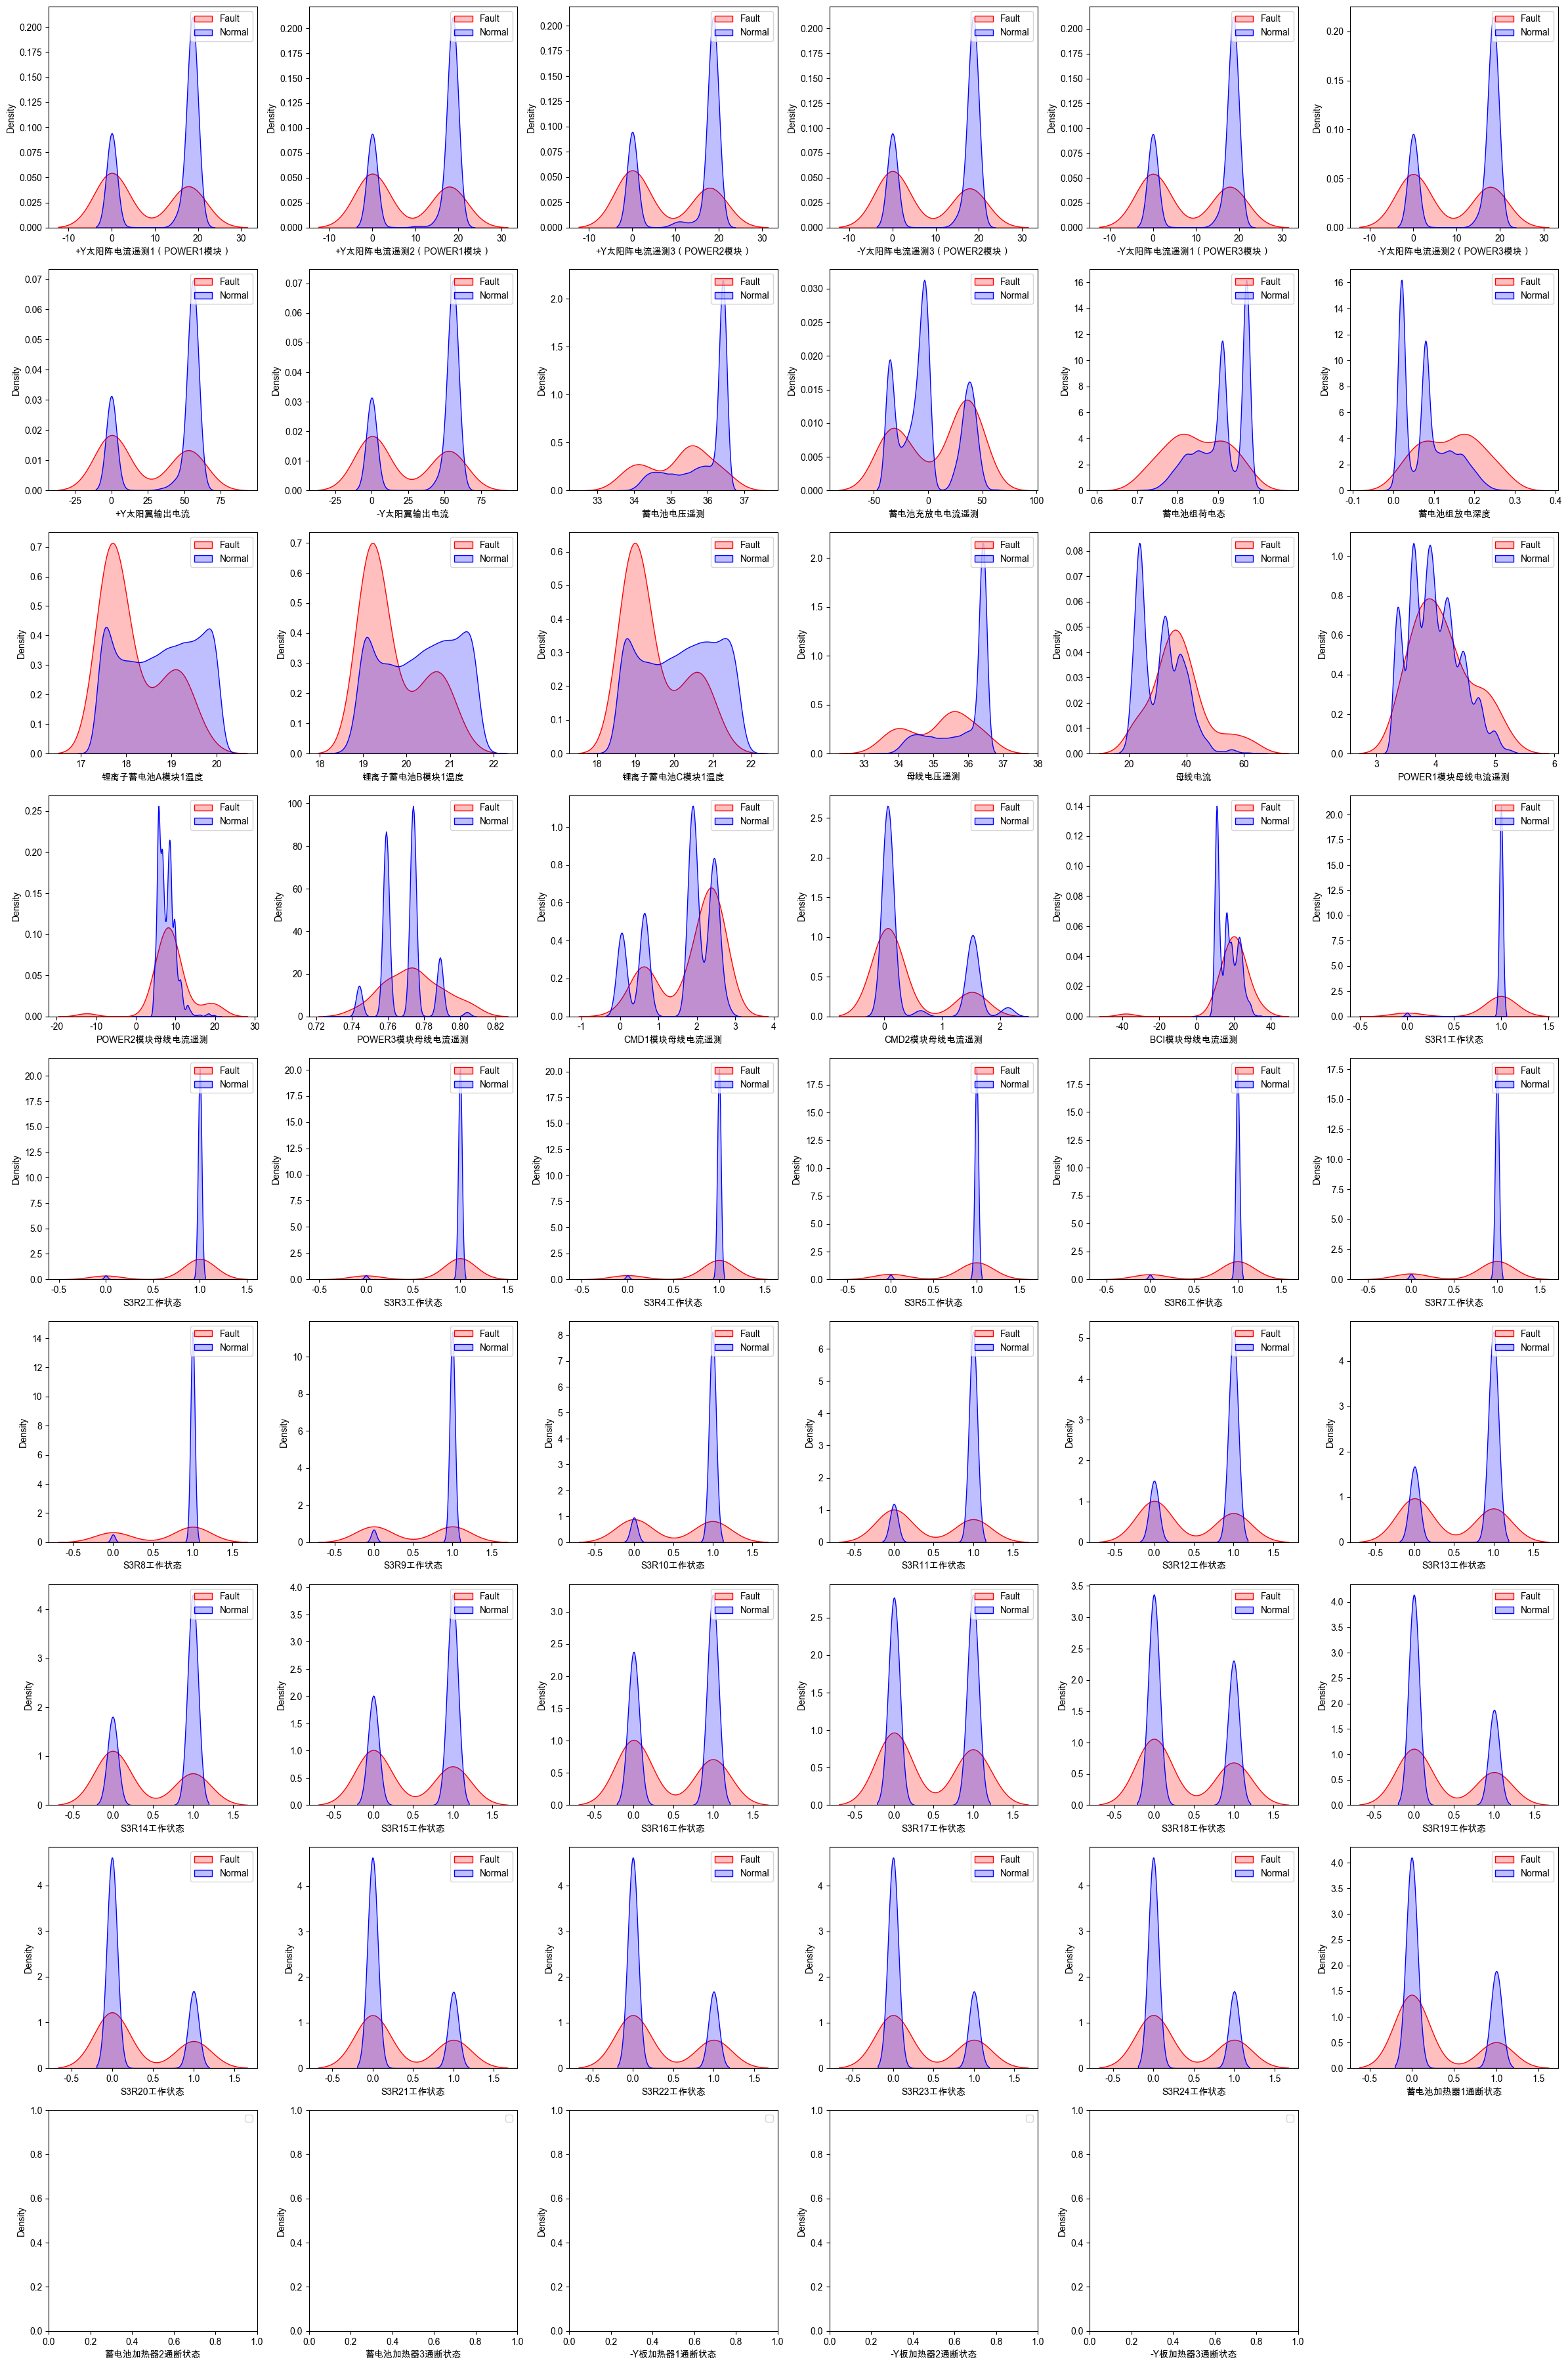

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df['label'].value_counts())
print(df[df['label'] == 0].shape)

# 筛选数值型列
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 设置字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算子图的行数和列数
dist_cols = 6
dist_rows = len(df.columns)
plt.figure(figsize=(4*dist_cols,4*dist_rows))

# 绘制每个数值型列的 KDE 图
i = 1
for col in numeric_cols:
    ax = plt.subplot(dist_rows, dist_cols, i)
    
    # 绘制 `label != 0` 和 `label == 0` 的分布
    sns.kdeplot(df[df['label'] == 8][col], color="Red", fill=True, ax=ax)
    sns.kdeplot(df[df['label'] == 0][col], color="Blue", fill=True, ax=ax)
    
    ax.set_xlabel(col)
    ax.set_ylabel("Density")
    ax.legend(['Fault', 'Normal'])
    i += 1

plt.tight_layout()
plt.show()


报错 Dataset has 0 variance 说明异常数据或正常数据在这些特征上只有一个取值，导致计算方差时出现异常。事实上可以直接用这些特征进行故障监测。

从最后一张子图可以看到故障类型的分布

In [56]:
# 划分训练集和测试集，针对时间序列采用均匀降采样
test_indices = list(range(0, len(df), 3))
test = df.iloc[test_indices]
train = df.drop(test_indices)
print(f"dataset shape after preprocessing: {df.shape}")
print(f"train shape: {train.shape}")
print(f"test shape: {test.shape}")

dataset shape after preprocessing: (22784, 54)
train shape: (15189, 54)
test shape: (7595, 54)


In [57]:
# 保存
df.to_csv(os.path.join(save_path, "all.csv"), index=False)
train.to_csv(os.path.join(save_path, "train.csv"), index=False)
test.to_csv(os.path.join(save_path, "test.csv"), index=False)